In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pickle
import sys
sys.path.insert(1, '../../')
from utils import *


In [2]:
plt.rcParams.update({'font.size': 13})

## Functions:

## Parameters

In [3]:
dataset = 'pr_school'

In [4]:
weighted = True

In [5]:
mu = 0.1

In [6]:
import os
folder = '../figs'
if not os.path.exists(folder):
    os.makedirs(folder)

In [7]:
if dataset == 'hospital':
    beta_betaT_range = [(0.6,0.8),
                        (0.2,0.8),
                        (0.3,5),
                        (0.4,7.5),
                        (0.15,5),
                        (0.3,10),
                        (0.1,10),
                        (0.06,10),
                        (0.05,15),
                        (0.05,19)]
    a_inf = 0.6
    a_sup = 0.7
elif dataset == 'high_school':
    beta_betaT_range = [(0.7,5),(0.9,5),(0.7,7),(1,7)]
    a_inf = 0.6
    a_sup = 0.7
elif dataset == 'workplace':
    a_inf = 0.3
    a_sup = 0.4
    beta_betaT_range = [(0.25,6.5),
                        (0.25,7),
                        (0.2,7),
                        (0.2,7.3)]
    
elif dataset == 'conference':
    beta_betaT_range = [(0.4,12)]
    a_inf = 0.4
    a_sup = 0.5
elif dataset == 'pr_school':
    a_inf = 0.6
    a_sup = 0.7
    beta_betaT_range = [(0.07,7),
                        (0.1,7),
                        (0.1,5),
                        (0.2,7),
                        (0.15,5),
                        (0.2,5),
                        (0.2,3),
                        (0.2,1)]

In [8]:
CL_list = []
CT_list = []
C_list = []
for (beta,betaT) in beta_betaT_range:
    file_nameL = "results/inf_treeSIR_a_fixed/a_%.1f_%.1f_final/CL_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.3f.csv"%(a_inf,a_sup,dataset,beta,betaT,mu)
    CL_list_tmp = load_C_list(file_nameL)
    CL_mean = np.mean(CL_list_tmp,axis=0)
    CL_list.append(CL_mean)
    file_nameT = "results/inf_treeSIR_a_fixed/a_%.1f_%.1f_final/CT_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.3f.csv"%(a_inf,a_sup,dataset,beta,betaT,mu)
    CT_list_tmp = load_C_list(file_nameT)
    CT_mean = np.mean(CT_list_tmp,axis=0)
    CT_list.append(CT_mean)
    C_list.append(CL_mean+CT_mean)

In [9]:
np.sum(CL_mean), np.sum(CT_mean)

(69.83527108396663, 92.16472891603335)

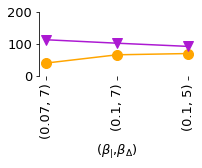

In [10]:
fig,ax = plt.subplots(1,1,figsize=(3,2.5286))
plt.plot(np.sum(CL_list,axis=1),'o-',label='$|C_1|$',color='orange',markersize=10)
plt.plot(np.sum(CT_list,axis=1),'v-',label='$|C_2|$',color='#ac19d2',markersize=10)
plt.xlabel(r'($\beta_|$,$\beta_{\Delta}$)')
#plt.ylabel('$|C|$')
plt.xticks([i for i in range(len(beta_betaT_range))],beta_betaT_range,rotation='vertical')
if dataset == 'pr_school':
    plt.ylim([0,200])
elif dataset == 'hospital':
    plt.ylim([-5,55])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.tight_layout()
figname = '../figs/CL_CT_mean_weighted_%s_mu_%.2f_a_%.1f_%.1f.pdf'%(dataset,mu,a_inf,a_sup)
plt.savefig(figname)
plt.show()

In [11]:
S = np.full((len(beta_betaT_range),len(beta_betaT_range)),0.0)
for i in range(len(beta_betaT_range)-1):
    for j in range(i+1,len(beta_betaT_range)):
        S[i,j] = cos_sim(C_list[i],C_list[j])

In [12]:
figname = '../figs/cos_sim_%s_mu_%.2f_a_%.1f_%.1f'%(dataset,mu,a_inf,a_sup)

../figs/cos_sim_pr_school_mu_0.10_a_0.6_0.7.pdf


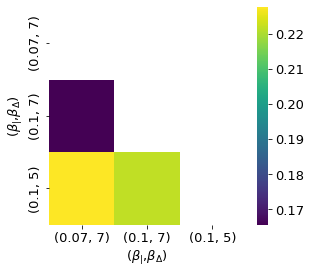

In [13]:
plot_sim(S, mu, beta_betaT_range, ax_label=r'($\beta_|$,$\beta_{\Delta}$)', save=True, figname=figname)

../figs/cos_sim_pr_school_mu_0.10_a_0.6_0.7.pdf


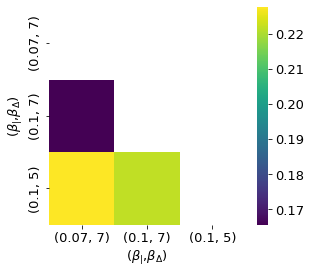

In [14]:
plot_sim(S, mu, beta_betaT_range, ax_label=r'($\beta_|$,$\beta_{\Delta}$)', save=True, figname=figname)